# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [21]:
df = pd.read_csv('df_train.csv', index_col = 0) # load the data

In [22]:
#overview dataset
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [23]:
#Getting info about the dataframe e.g datatype,number of columns, missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

###### The dataset has 49 columns with 8763 entries. Column "Valencia_pressure " is the only one with missing values
All the columns are numerical except Valencia_snow_3h

In [24]:
#Calculating the number of missing values
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [25]:
#Calculating the percentage of mkissing values in each column
pd.DataFrame(data={'% of Missing Values':round(df.isna().sum()/df.isna().count()*100,2)})

,% of Missing Values
time,0.0
Madrid_wind_speed,0.0
Valencia_wind_deg,0.0
Bilbao_rain_1h,0.0
Valencia_wind_speed,0.0
Seville_humidity,0.0
Madrid_humidity,0.0
Bilbao_clouds_all,0.0
Bilbao_wind_speed,0.0
Seville_clouds_all,0.0


In [26]:
#Check the number of unique values in each column
df.nunique()

time                    8763
Madrid_wind_speed         38
Valencia_wind_deg         10
Bilbao_rain_1h            20
Valencia_wind_speed       58
Seville_humidity         274
Madrid_humidity          280
Bilbao_clouds_all        277
Bilbao_wind_speed         39
Seville_clouds_all       246
Bilbao_wind_deg         1042
Barcelona_wind_speed      39
Barcelona_wind_deg       974
Madrid_clouds_all        250
Seville_wind_speed        38
Barcelona_rain_1h         31
Seville_pressure          25
Seville_rain_1h           17
Bilbao_snow_3h            83
Barcelona_pressure       189
Seville_rain_3h           50
Madrid_rain_1h            19
Barcelona_rain_3h         77
Valencia_snow_3h           6
Madrid_weather_id        289
Barcelona_weather_id     269
Bilbao_pressure          205
Seville_weather_id       301
Valencia_pressure        143
Seville_temp_max        3294
Madrid_pressure          298
Valencia_temp_max       3387
Valencia_temp           4531
Bilbao_weather_id        356
Seville_temp  

In [27]:
df[['Madrid_wind_speed','Madrid_humidity','Madrid_clouds_all','Madrid_rain_1h','Madrid_weather_id','Madrid_pressure','Madrid_temp_max','Madrid_temp','Madrid_temp_min']]

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
0,0.666667,64.000000,0.000000,0.0,800.000000,971.333333,265.938000,265.938000,265.938000
1,0.333333,64.666667,0.000000,0.0,800.000000,972.666667,266.386667,266.386667,266.386667
2,1.000000,64.333333,0.000000,0.0,800.000000,974.000000,272.708667,272.708667,272.708667
3,1.000000,56.333333,0.000000,0.0,800.000000,994.666667,281.895219,281.895219,281.895219
4,1.000000,57.000000,0.000000,0.0,800.000000,1035.333333,280.678437,280.678437,280.678437
...,...,...,...,...,...,...,...,...,...
8758,1.000000,95.666667,45.000000,0.0,727.666667,1024.000000,280.816667,279.686667,278.483333
8759,5.000000,85.000000,85.000000,0.0,762.000000,1023.666667,283.483333,282.400000,280.150000
8760,6.333333,71.000000,85.000000,0.1,702.333333,1021.666667,285.150000,283.956667,281.150000
8761,7.333333,79.000000,56.666667,0.3,500.000000,1023.000000,283.483333,282.666667,280.816667


In [28]:
df[['Valencia_wind_deg','Valencia_wind_speed','Valencia_snow_3h','Valencia_pressure','Valencia_temp_max','Valencia_temp','Valencia_temp_min','Valencia_humidity']]

,Valencia_wind_deg,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_temp_min,Valencia_humidity
0,level_5,0.666667,0.0,1002.666667,269.888000,269.888000,269.888000,75.666667
1,level_10,1.666667,0.0,1004.333333,271.728333,271.728333,271.728333,71.000000
2,level_9,1.000000,0.0,1005.333333,278.008667,278.008667,278.008667,65.666667
3,level_8,1.000000,0.0,1009.000000,284.899552,284.899552,284.899552,54.000000
4,level_7,1.000000,0.0,NaN,283.015115,283.015115,283.015115,58.333333
...,...,...,...,...,...,...,...,...
8758,level_6,2.666667,0.0,NaN,282.483333,282.483333,282.483333,71.333333
8759,level_6,2.000000,0.0,1021.000000,291.816667,291.816667,291.816667,40.333333
8760,level_9,7.333333,0.0,1009.666667,290.706333,290.706333,290.706333,44.666667
8761,level_8,7.333333,0.0,1020.000000,290.483333,290.483333,290.483333,45.000000


In [29]:
df[['Bilbao_rain_1h','Bilbao_clouds_all','Bilbao_wind_speed','Bilbao_wind_deg','Bilbao_snow_3h','Bilbao_pressure','Bilbao_weather_id','Bilbao_temp_min','Bilbao_temp','Bilbao_temp_max']]

,Bilbao_rain_1h,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_snow_3h,Bilbao_pressure,Bilbao_weather_id,Bilbao_temp_min,Bilbao_temp,Bilbao_temp_max
0,0.0,0.000000,1.000000,223.333333,0.0,1035.000000,800.000000,269.338615,269.338615,269.338615
1,0.0,0.000000,1.000000,221.000000,0.0,1035.666667,800.000000,270.376000,270.376000,270.376000
2,0.0,0.000000,1.000000,214.333333,0.0,1036.000000,800.000000,275.027229,275.027229,275.027229
3,0.0,0.000000,1.000000,199.666667,0.0,1036.000000,800.000000,281.135063,281.135063,281.135063
4,0.0,2.000000,0.333333,185.000000,0.0,1035.333333,800.000000,282.252063,282.252063,282.252063
...,...,...,...,...,...,...,...,...,...,...
8758,0.0,56.666667,4.333333,226.666667,0.0,1017.666667,802.333333,285.150000,287.573333,290.150000
8759,0.0,26.666667,8.000000,220.000000,0.0,1015.333333,801.333333,286.483333,288.616667,291.150000
8760,0.4,63.333333,8.333333,283.333333,0.0,1017.333333,601.000000,283.816667,285.330000,286.816667
8761,0.2,63.333333,2.666667,220.000000,0.0,1020.333333,634.166667,278.816667,281.410000,284.150000


In [30]:
df[['Seville_humidity','Seville_clouds_all','Seville_wind_speed','Seville_pressure','Seville_rain_1h','Seville_rain_3h','Seville_weather_id','Seville_temp_max','Seville_temp','Seville_temp_min']]

,Seville_humidity,Seville_clouds_all,Seville_wind_speed,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_weather_id,Seville_temp_max,Seville_temp,Seville_temp_min
0,74.333333,0.000000,3.333333,sp25,0.0,0.0,800.000000,274.254667,274.254667,274.254667
1,78.333333,0.000000,3.333333,sp25,0.0,0.0,800.000000,274.945000,274.945000,274.945000
2,71.333333,0.000000,2.666667,sp25,0.0,0.0,800.000000,278.792000,278.792000,278.792000
3,65.333333,0.000000,4.000000,sp25,0.0,0.0,800.000000,285.394000,285.394000,285.394000
4,59.000000,0.000000,3.000000,sp25,0.0,0.0,800.000000,285.513719,285.513719,285.513719
...,...,...,...,...,...,...,...,...,...,...
8758,89.000000,80.000000,1.000000,sp23,0.0,0.0,769.333333,285.483333,285.076667,284.816667
8759,82.000000,75.000000,1.666667,sp23,0.0,0.0,803.000000,288.483333,287.673333,287.150000
8760,67.666667,33.333333,3.666667,sp22,0.0,0.0,801.666667,291.483333,290.070000,289.150000
8761,67.666667,51.666667,4.333333,sp23,0.0,0.0,802.333333,291.483333,290.070000,289.150000


In [31]:
df[['Barcelona_wind_speed','Barcelona_wind_deg','Barcelona_rain_1h','Barcelona_rain_3h','Barcelona_pressure','Barcelona_weather_id','Barcelona_temp_max','Barcelona_temp','Barcelona_temp_min']]

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_pressure,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min
0,6.333333,42.666667,0.0,0.0,1036.333333,800.0,281.013000,281.013000,281.013000
1,4.000000,139.000000,0.0,0.0,1037.333333,800.0,280.561667,280.561667,280.561667
2,2.000000,326.000000,0.0,0.0,1038.000000,800.0,281.583667,281.583667,281.583667
3,2.333333,273.000000,0.0,0.0,1037.000000,800.0,283.434104,283.434104,283.434104
4,4.333333,260.000000,0.0,0.0,1035.000000,800.0,284.213167,284.213167,284.213167
...,...,...,...,...,...,...,...,...,...
8758,1.666667,83.666667,0.0,0.0,1021.000000,801.0,282.150000,281.276667,280.483333
8759,3.000000,213.333333,0.0,0.0,1019.000000,801.0,287.816667,287.483333,287.150000
8760,5.333333,256.666667,0.0,0.0,1015.666667,801.0,290.483333,289.816667,289.150000
8761,5.333333,250.000000,0.0,0.0,1015.000000,800.0,288.150000,287.523333,286.816667


In [32]:
df.describe(include='object').T

,count,unique,top,freq
time,8763,8763,2017-09-05 12:00:00,1
Valencia_wind_deg,8763,10,level_1,1072
Seville_pressure,8763,25,sp13,500


In [33]:
#Making a list of all catrgorical variables 
cat_col=['time','Valencia_wind_deg','Seville_pressure']

#Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print('-'*50)

2017-09-05 12:00:00    1
2017-10-27 09:00:00    1
2015-10-23 09:00:00    1
2015-05-09 18:00:00    1
2016-08-14 03:00:00    1
                      ..
2017-11-07 18:00:00    1
2015-06-15 12:00:00    1
2015-11-17 03:00:00    1
2015-08-29 00:00:00    1
2017-07-12 03:00:00    1
Name: time, Length: 8763, dtype: int64
--------------------------------------------------
level_1     1072
level_5      915
level_4      914
level_3      890
level_7      882
level_6      881
level_2      874
level_10     839
level_8      798
level_9      698
Name: Valencia_wind_deg, dtype: int64
--------------------------------------------------
sp13    500
sp10    460
sp8     418
sp6     411
sp25    410
sp21    408
sp24    405
sp4     404
sp17    401
sp18    395
sp16    392
sp22    392
sp12    378
sp5     372
sp19    357
sp20    340
sp23    339
sp15    326
sp2     325
sp3     309
sp1     270
sp14    255
sp9     183
sp7     174
sp11    139
Name: Seville_pressure, dtype: int64
---------------------------------------

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [34]:
# look at data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


In [35]:
#Checking for outliers in the different columns
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

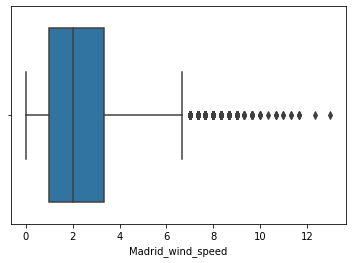

In [36]:
sns.boxplot(x='Madrid_wind_speed', data=df);

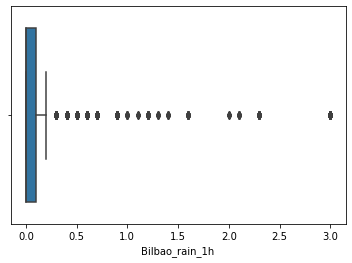

In [37]:
sns.boxplot(x='Bilbao_rain_1h', data=df);

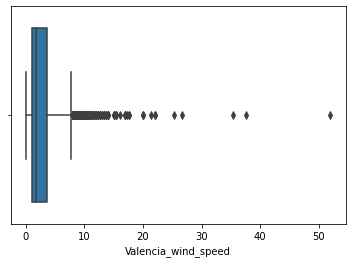

In [38]:
sns.boxplot(x='Valencia_wind_speed', data=df);

In [40]:
df.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

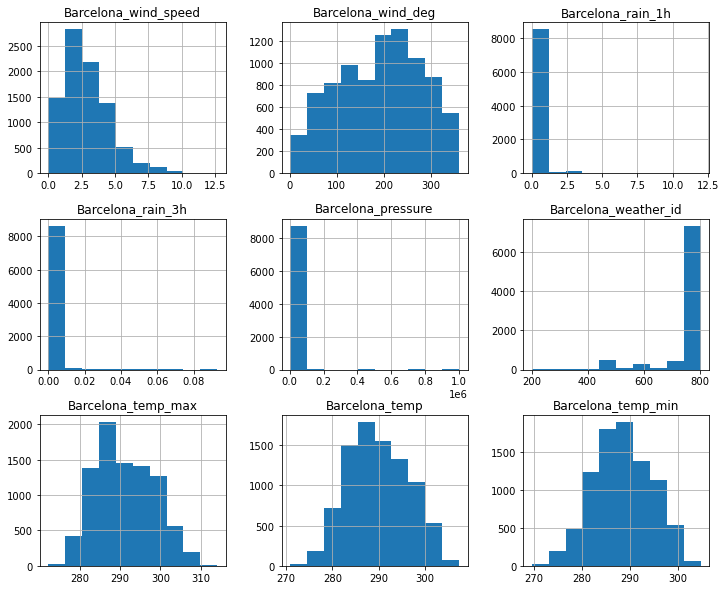

In [41]:
# plot relevant feature interactions
#Creating list of features for Barcelona
feature_1 = ['Barcelona_wind_speed','Barcelona_wind_deg','Barcelona_rain_1h','Barcelona_rain_3h','Barcelona_pressure','Barcelona_weather_id','Barcelona_temp_max','Barcelona_temp','Barcelona_temp_min']
df[feature_1].hist(figsize=(12,10));

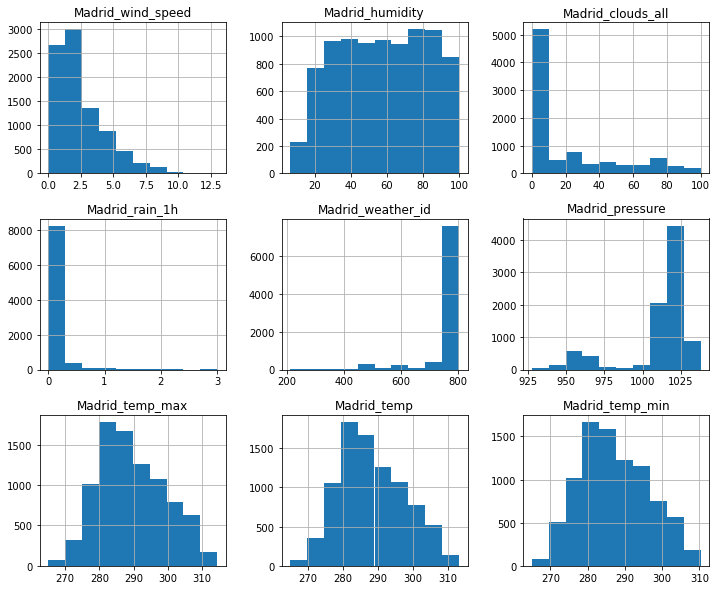

In [42]:
#Creating a list for Madrid features
features_2 = ['Madrid_wind_speed','Madrid_humidity','Madrid_clouds_all','Madrid_rain_1h','Madrid_weather_id','Madrid_pressure','Madrid_temp_max','Madrid_temp','Madrid_temp_min']
df[features_2].hist(figsize=(12,10));

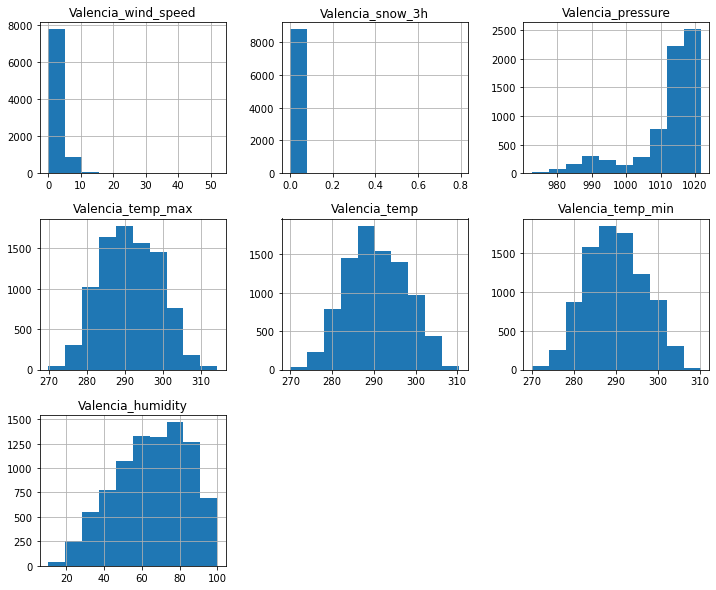

In [43]:
#Creating a list for Valencia features
features_3= ['Valencia_wind_deg','Valencia_wind_speed','Valencia_snow_3h','Valencia_pressure','Valencia_temp_max','Valencia_temp','Valencia_temp_min','Valencia_humidity']
df[features_3].hist(figsize=(12,10));

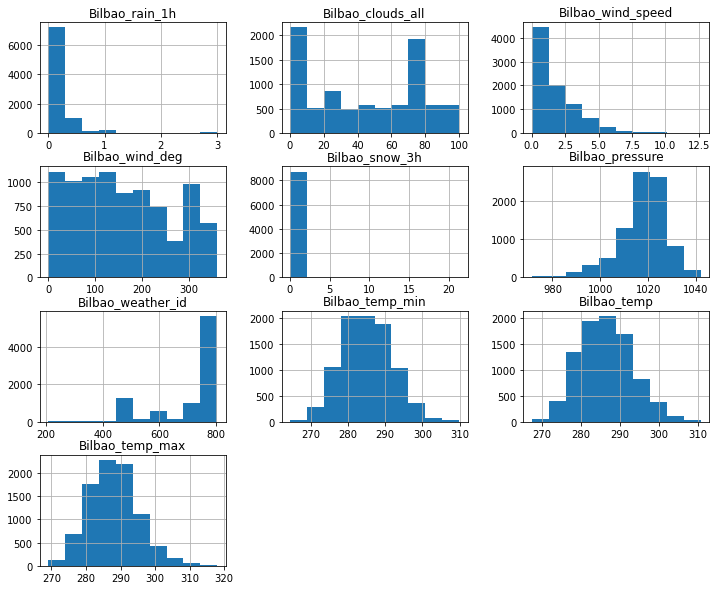

In [44]:
#Creating a list of features for Bilbao
features_4 = ['Bilbao_rain_1h','Bilbao_clouds_all','Bilbao_wind_speed','Bilbao_wind_deg','Bilbao_snow_3h','Bilbao_pressure','Bilbao_weather_id','Bilbao_temp_min','Bilbao_temp','Bilbao_temp_max']
df[features_4].hist(figsize=(12,10));

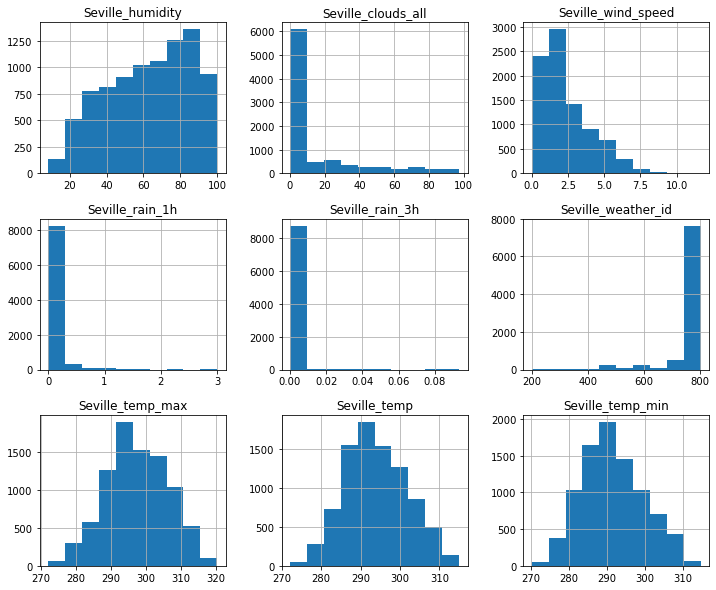

In [45]:
#Creating a list for Seville features
features_5= ['Seville_pressure','Seville_humidity','Seville_clouds_all','Seville_wind_speed','Seville_pressure','Seville_rain_1h','Seville_rain_3h','Seville_weather_id','Seville_temp_max','Seville_temp','Seville_temp_min']
df[features_5].hist(figsize=(12,10));

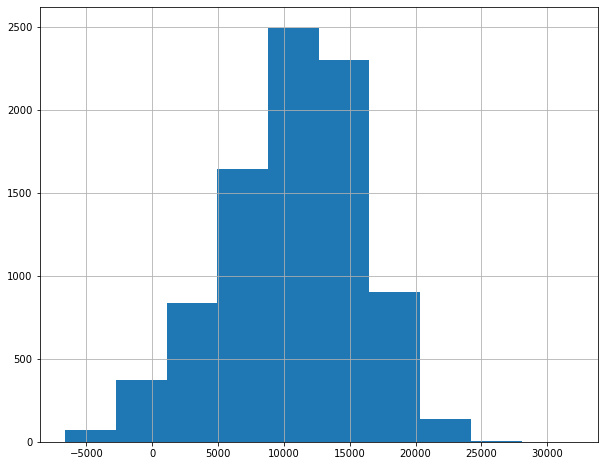

In [46]:
df['load_shortfall_3h'].hist(figsize=(10,8));

In [ ]:
# plot relevant feature interactions

In [47]:
# evaluate correlation
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


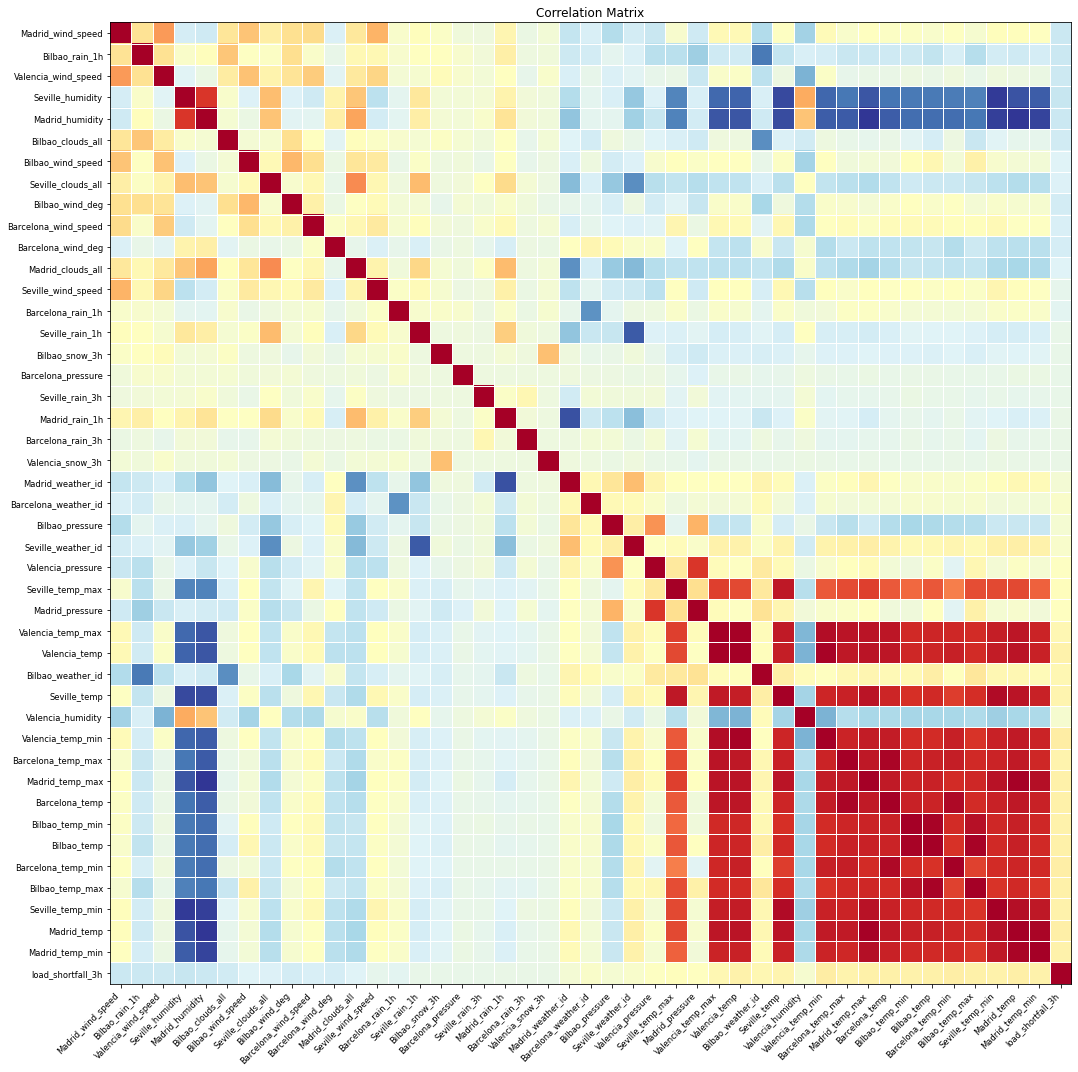

In [49]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [111]:
df_copy = df.copy()

In [112]:
# remove missing values/ features
def pre_processing(input_df):
   # remove missing values/ features
    input_df['Valencia_pressure'].fillna(input_df['Valencia_pressure'].mean(), inplace = True)
    # create new features
    #Transforming Valencia_wind_deg to numeric
    input_df['Valencia_wind_deg'] = input_df['Valencia_wind_deg'].str.extract('(\d+)')
    input_df['Seville_pressure'] = input_df['Seville_pressure'].str.extract('(\d+)')
    #Transforming time to numeric
    input_df['time']=input_df['time'].astype('datetime64[ns]')
    #Day
    input_df['Day'] = input_df['time'].dt.day
    # month
    input_df['Month'] = input_df['time'].dt.month
    # year
    input_df['Year'] = input_df['time'].dt.year
    # hour
    input_df['Hour'] = input_df['time'].dt.hour
    # minute
    input_df['Minute'] = input_df['time'].dt.minute
    # second
    input_df['Second'] = input_df['time'].dt.second
    # Monday is 0 and Sunday is 6
    input_df['Weekday'] = input_df['time'].dt.weekday
    #Dropping some columns
    input_df =input_df.drop(['time'], axis =1, inplace=True)
    return input_df

In [113]:
pre_processing(df_copy)

In [114]:
df_copy.isnull().sum()

Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_max         0
Barcelona_te

In [115]:
df_copy.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Hour,Minute,Second,Weekday
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,265.938000,265.938000,6715.666667,1,1,2015,3,0,0,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,266.386667,266.386667,4171.666667,1,1,2015,6,0,0,3
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,272.708667,272.708667,4274.666667,1,1,2015,9,0,0,3
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,281.895219,281.895219,5075.666667,1,1,2015,12,0,0,3
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,280.678437,280.678437,6620.666667,1,1,2015,15,0,0,3


In [116]:
df_copy.tail()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Hour,Minute,Second,Weekday
8758,1.000000,6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,...,279.686667,278.483333,-28.333333,31,12,2017,9,0,0,6
8759,5.000000,6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,...,282.400000,280.150000,2266.666667,31,12,2017,12,0,0,6
8760,6.333333,9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,...,283.956667,281.150000,822.000000,31,12,2017,15,0,0,6
8761,7.333333,8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,...,282.666667,280.816667,-760.000000,31,12,2017,18,0,0,6
8762,4.333333,9,0.0,7.000000,78.666667,68.666667,20.000000,1.666667,33.333333,156.666667,...,281.396667,280.483333,2780.666667,31,12,2017,21,0,0,6


In [117]:
df_copy.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [118]:
# split data
#Splitting the data into features and labels
X = df_copy.drop('load_shortfall_3h' , axis=1)
y = df_copy.pop('load_shortfall_3h') 

In [119]:
X

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Hour,Minute,Second,Weekday
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,...,274.254667,265.938000,265.938000,1,1,2015,3,0,0,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,...,274.945000,266.386667,266.386667,1,1,2015,6,0,0,3
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,...,278.792000,272.708667,272.708667,1,1,2015,9,0,0,3
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,...,285.394000,281.895219,281.895219,1,1,2015,12,0,0,3
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,...,285.513719,280.678437,280.678437,1,1,2015,15,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,...,284.816667,279.686667,278.483333,31,12,2017,9,0,0,6
8759,5.000000,6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,...,287.150000,282.400000,280.150000,31,12,2017,12,0,0,6
8760,6.333333,9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,...,289.150000,283.956667,281.150000,31,12,2017,15,0,0,6
8761,7.333333,8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,...,289.150000,282.666667,280.816667,31,12,2017,18,0,0,6


In [120]:
y

0       6715.666667
1       4171.666667
2       4274.666667
3       5075.666667
4       6620.666667
           ...     
8758     -28.333333
8759    2266.666667
8760     822.000000
8761    -760.000000
8762    2780.666667
Name: load_shortfall_3h, Length: 8763, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
# create one or more ML models
lm = LinearRegression()
#Fit the model
lm.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = lm.predict(X_test)

In [125]:
def rmse(y_test,y_predict):
    return np.sqrt(MSE(y_test,y_predict))

In [126]:
rmse(y_test,y_pred)

4635.807847667005

In [131]:
# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

In [132]:
# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=200, max_depth=8)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=200)

In [133]:
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(MSE(y_test,y_pred)))

RMSE: 3313.1765579232087


In [105]:
df_test = pd.read_csv('df_test.csv', index_col=0)

In [109]:
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [110]:
df_test.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [106]:
df_test1 = df_test.copy()

In [107]:
pre_processing(df_test1)

In [108]:
df_test1.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Hour,Minute,Second,Weekday
8763,5.000000,8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,...,283.150000,279.866667,279.150000,1,1,2018,0,0,0,0
8764,4.666667,8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,...,281.150000,279.193333,278.150000,1,1,2018,3,0,0,0
8765,2.333333,7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,...,280.483333,276.340000,276.150000,1,1,2018,6,0,0,0
8766,2.666667,7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,...,279.150000,275.953333,274.483333,1,1,2018,9,0,0,0
8767,4.000000,7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,...,284.483333,280.686667,280.150000,1,1,2018,12,0,0,0


In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic